In [1]:
import pandas as pd


In [1]:
df = pd.read_csv('agric_data.csv')


NameError: name 'pd' is not defined

In [12]:
df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [13]:
unique_crop_types = df["Crop_type"].unique()

In [14]:
print("Unique Crop Types:", unique_crop_types)

Unique Crop Types: ['coffee' 'potato' 'banana' 'wheat' 'cassava' 'maize' 'tea' 'rice']


In [15]:
num_unique_crop_types = len(unique_crop_types)

In [16]:
print("Number of Unique Crop Types:", num_unique_crop_types)

Number of Unique Crop Types: 8


In [17]:
wheat_data= df[df["Crop_type"] == "wheat"]

In [18]:
max_yield_wheat = wheat_data["Annual_yield"].max()

In [19]:
max_yield_wheat_rounded = round(max_yield_wheat, 2)

In [20]:
print("Maximum Annual Yield for Wheat:", max_yield_wheat_rounded)

Maximum Annual Yield for Wheat: 8.99


In [21]:
filtered_data = df.groupby("Crop_type").filter(lambda x: x["Pollution_level"].mean() > 0.2)

total_rainfall = filtered_data.groupby("Crop_type")["Rainfall"].sum()

print("Total Rainfall for Crop Types with Average Pollution Level > 0.2:")
print(total_rainfall)


Total Rainfall for Crop Types with Average Pollution Level > 0.2:
Crop_type
cassava    178709.1
coffee     148849.5
maize       57184.0
potato      93860.2
tea        210650.5
wheat      252706.4
Name: Rainfall, dtype: float64


In [22]:
sum_of_total_rainfall=[178709.1, 148849.5, 57184.0, 93860.2, 210650.5, 252706.4]
print(sum(sum_of_total_rainfall))

941959.7000000001


In [23]:
def calculate_temperature_range(field_id):
    field_data = df[df["Field_ID"] == field_id]
    temperature_range = field_data["Max_temperature_C"].values[0] - field_data["Min_temperature_C"].values[0]
    return temperature_range

In [24]:
field_ids_to_call = [1458, 1895, 5443]

In [25]:
for field_id in field_ids_to_call:
    result = calculate_temperature_range(field_id)
    print(f"Temperature Range for Field_ID {field_id}: {result} C")

Temperature Range for Field_ID 1458: 40.7 C
Temperature Range for Field_ID 1895: 35.7 C
Temperature Range for Field_ID 5443: 33.4 C


In [35]:
#The following code identifies the crop type with the lowest average minimum temperature.
a = df['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = df[df['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)

rice


In [45]:
#To calculate the total plot size for plots where the pH is less than 5.5.
filtered_data = df[df['pH'] < 5.5]

# Calculate the total plot size for the filtered data
total_plot_size = filtered_data['Plot_size'].sum()

# Display the result
print("Total Plot Size for Plots with pH < 5.5:", total_plot_size)

Total Plot Size for Plots with pH < 5.5: 1731.8999999999999


In [48]:
filtered_data = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

In [49]:
# Get the number of rows in the filtered dataset
num_rows_filtered = len(filtered_data)

# Display the result
print("Number of Rows in Filtered Dataset:", num_rows_filtered)

Number of Rows in Filtered Dataset: 319


In [50]:
#Using Numpy, we calculate the standard deviation of the 'Rainfall' for plots
#where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).
import numpy as np
import pandas as pd

In [51]:
# Calculate the median plot size
median_plot_size = df['Plot_size'].median()

# Filter rows where 'Plot_size' is larger than the median plot size
filtered_data = df[df['Plot_size'] > median_plot_size]

# Calculate the standard deviation of 'Rainfall' for the filtered data
rainfall_std_dev = np.std(filtered_data['Rainfall'])

# Round the result to 2 decimal places
rainfall_std_dev_rounded = round(rainfall_std_dev, 2)

# Display the result
print("Standard Deviation of Rainfall for Plots with Size > Median Size:", rainfall_std_dev_rounded)

Standard Deviation of Rainfall for Plots with Size > Median Size: 469.62


In [52]:
# Find the most common 'Max_temperature_C'
most_common_max_temp = df['Max_temperature_C'].mode().iloc[0]

# Get the first three digits of the most common 'Max_temperature_C'
first_three_digits = str(most_common_max_temp)[:3]

# Find the least common 'Crop_type'
least_common_crop_type = df['Crop_type'].value_counts().idxmin()

# Get the last three letters of the least common 'Crop_type'
last_three_letters = least_common_crop_type[-3:]

# Concatenate the results
result_string = first_three_digits + last_three_letters

# Display the result
print("Concatenated String:", result_string)

Concatenated String: 30.ice


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

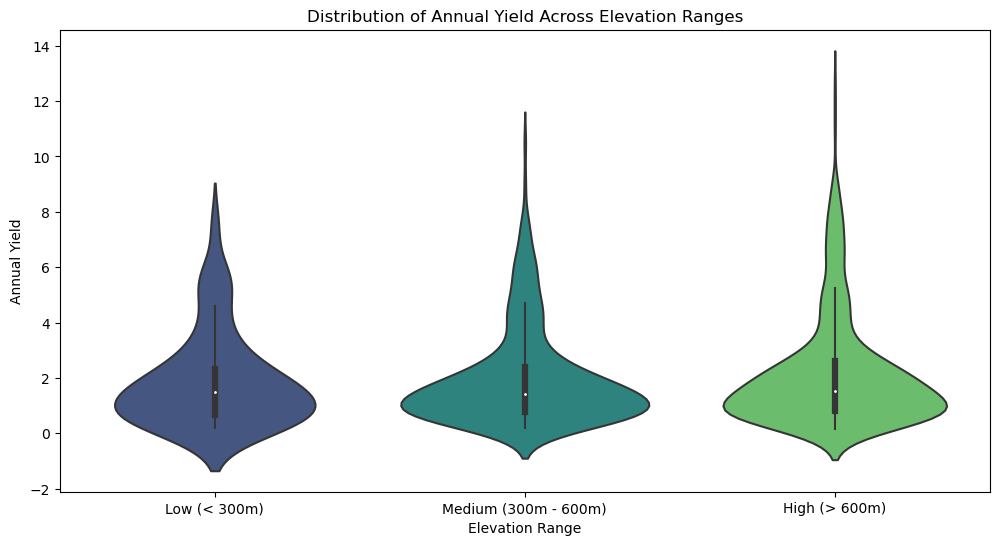

In [54]:

elevation_bins = [float('-inf'), 300, 600, float('inf')]
elevation_labels = ['Low (< 300m)', 'Medium (300m - 600m)', 'High (> 600m)']

# Categorize the data based on elevation range
df['Elevation_Category'] = pd.cut(df['Elevation'], bins=elevation_bins, labels=elevation_labels)

# To Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Elevation_Category', y='Annual_yield', data=df, palette='viridis')
plt.title('Distribution of Annual Yield Across Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield')
plt.show()

In [55]:
def calculate_crop_type_sum(crop_types, index=0):
    if index == len(crop_types):
        return 0
    else:
        crop_type_length = len(crop_types[index])
        return crop_type_length + calculate_crop_type_sum(crop_types, index + 1)

# Get unique crop types from the dataset
unique_crop_types = df['Crop_type'].unique()

# Calculate the sum of integer values for each unique crop type
crop_type_sum = calculate_crop_type_sum(unique_crop_types)

# Display the result
print("Sum of Integer Values for Each Unique Crop Type:", crop_type_sum)

Sum of Integer Values for Each Unique Crop Type: 42


In [56]:
from scipy.stats import ttest_ind

In [57]:
coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test
t_statistic, p_value = ttest_ind(coffee_yield, banana_yield, equal_var=False)

# Display the p-value rounded to three decimal places
print("P-value:", round(p_value, 3))

P-value: 0.598


In [61]:
S = [['him', 'sell'], [90, 28, 43]]

S[0][1][1]


'e'